In [9]:
!pip install pandas matplotlib seaborn sqlalchemy


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# --- Thiết lập môi trường ---
# Tải các biến môi trường từ file .env
load_dotenv()

# Lấy thông tin kết nối từ biến môi trường
db_user = os.getenv('MYSQL_USER')
db_password = os.getenv('MYSQL_PASSWORD')
db_host = os.getenv('MYSQL_HOST')
db_port = os.getenv('MYSQL_PORT')
db_name = os.getenv('MYSQL_DATABASE')

# --- Tạo kết nối tới Database ---
# Chuỗi kết nối (connection string)
connection_string = f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

try:
    engine = create_engine(connection_string)
    print("Kết nối tới database thành công!")
except Exception as e:
    print(f"Lỗi kết nối database: {e}")

# --- Thiết lập style cho biểu đồ ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

Kết nối tới database thành công!


Top 10 bang theo doanh thu:


,customer_state,total_revenue
0,SP,5921678.12
1,RJ,2129681.98
2,MG,1856161.49
3,RS,885826.76
4,PR,800935.44
5,BA,611506.67
6,SC,610213.60
7,DF,353229.44
8,GO,347706.93
9,ES,324801.91


C:\Users\Windows\AppData\Local\Temp\ipykernel_14184\55035382.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


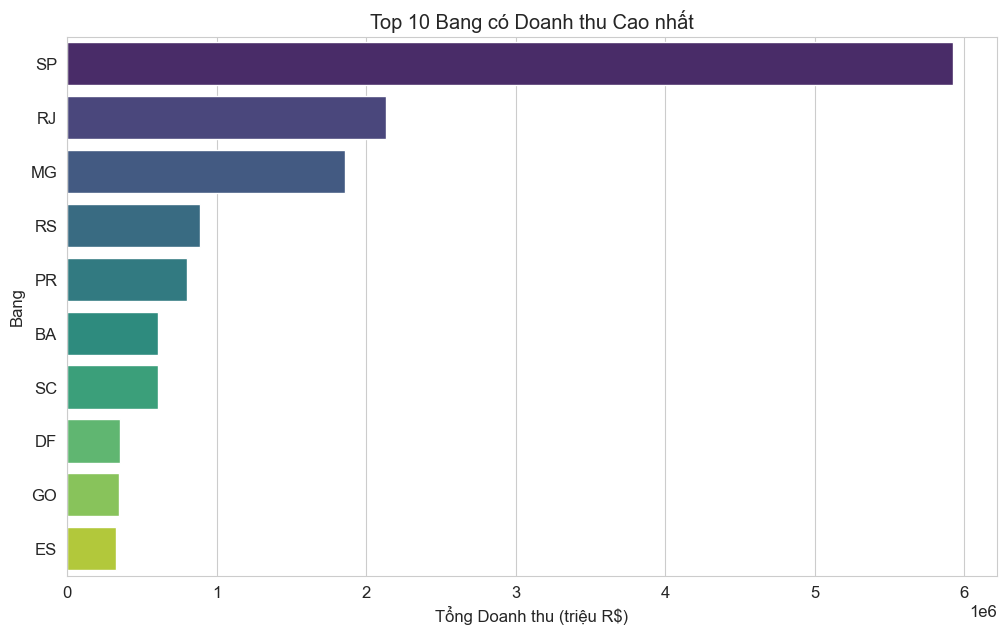

In [11]:
# --- Phân tích 1: Doanh thu theo bang ---

# 1. Viết câu lệnh SQL
query_revenue_by_state = """
SELECT
    c.customer_state,
    SUM(oi.price + oi.freight_value) AS total_revenue
FROM
    orders o
JOIN
    customers c ON o.customer_id = c.customer_id
JOIN
    order_items oi ON o.order_id = oi.order_id
GROUP BY
    c.customer_state
ORDER BY
    total_revenue DESC
LIMIT 10;
"""

# 2. Thực thi và lấy dữ liệu
df_revenue_state = pd.read_sql(query_revenue_by_state, engine)
print("Top 10 bang theo doanh thu:")
display(df_revenue_state)

# 3. Trực quan hóa
sns.barplot(
    data=df_revenue_state,
    x='total_revenue',
    y='customer_state',
    palette='viridis'
)
plt.title('Top 10 Bang có Doanh thu Cao nhất')
plt.xlabel('Tổng Doanh thu (triệu R$)')
plt.ylabel('Bang')
plt.show()

Thời gian giao hàng trung bình theo từng Review Score:


,review_score,avg_delivery_days
0,1,21.2519
1,2,16.6059
2,3,14.2024
3,4,12.2531
4,5,10.6254


C:\Users\Windows\AppData\Local\Temp\ipykernel_14184\1045615979.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


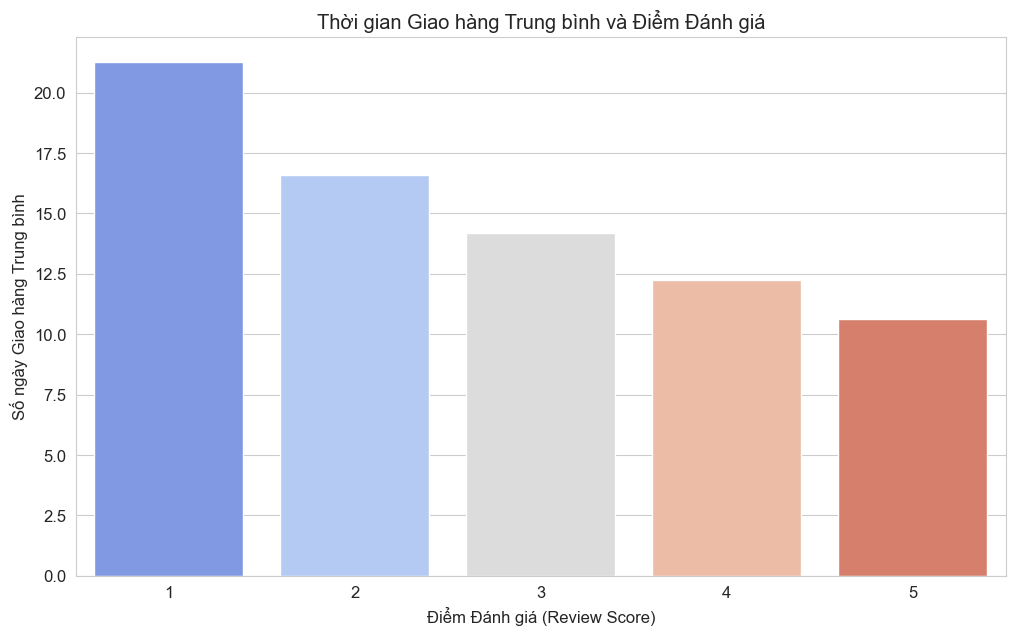

In [12]:
# --- Phân tích 2: Thời gian giao hàng và Review Score ---

# 1. Viết câu lệnh SQL
# DATEDIFF dùng để tính số ngày chênh lệch
query_delivery_time_review = """
SELECT
    r.review_score,
    AVG(DATEDIFF(o.order_delivered_customer_date, o.order_purchase_timestamp)) AS avg_delivery_days
FROM
    orders o
JOIN
    order_reviews r ON o.order_id = r.order_id
WHERE
    o.order_status = 'delivered'
    AND o.order_delivered_customer_date IS NOT NULL
GROUP BY
    r.review_score
ORDER BY
    r.review_score ASC;
"""

# 2. Thực thi và lấy dữ liệu
df_delivery_review = pd.read_sql(query_delivery_time_review, engine)
print("Thời gian giao hàng trung bình theo từng Review Score:")
display(df_delivery_review)

# 3. Trực quan hóa
sns.barplot(
    data=df_delivery_review,
    x='review_score',
    y='avg_delivery_days',
    palette='coolwarm'
)
plt.title('Thời gian Giao hàng Trung bình và Điểm Đánh giá')
plt.xlabel('Điểm Đánh giá (Review Score)')
plt.ylabel('Số ngày Giao hàng Trung bình')
plt.show()

Top 10 danh mục sản phẩm theo doanh thu:


,product_category_name,total_revenue
0,beleza_saude,1258681.34
1,relogios_presentes,1205005.68
2,cama_mesa_banho,1036988.68
3,esporte_lazer,988048.97
4,informatica_acessorios,911954.32
5,moveis_decoracao,729762.49
6,cool_stuff,635290.85
7,utilidades_domesticas,632248.66
8,automotivo,592720.11
9,ferramentas_jardim,485256.46


C:\Users\Windows\AppData\Local\Temp\ipykernel_14184\3479732591.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


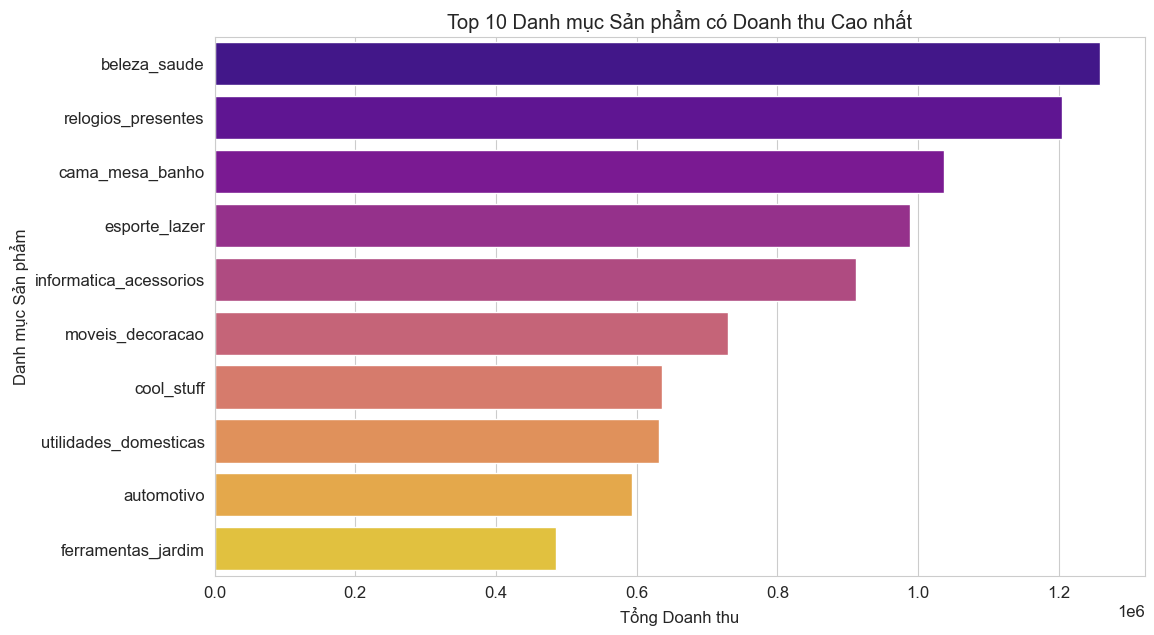

In [13]:
# --- Phân tích 3: Top danh mục sản phẩm theo doanh thu ---

# 1. Viết câu lệnh SQL
query_top_categories = """
SELECT
    p.product_category_name,
    SUM(oi.price) AS total_revenue
FROM
    order_items oi
JOIN
    products p ON oi.product_id = p.product_id
GROUP BY
    p.product_category_name
ORDER BY
    total_revenue DESC
LIMIT 10;
"""

# 2. Thực thi và lấy dữ liệu
df_top_categories = pd.read_sql(query_top_categories, engine)
print("Top 10 danh mục sản phẩm theo doanh thu:")
display(df_top_categories)

# 3. Trực quan hóa
sns.barplot(
    data=df_top_categories,
    x='total_revenue',
    y='product_category_name',
    palette='plasma'
)
plt.title('Top 10 Danh mục Sản phẩm có Doanh thu Cao nhất')
plt.xlabel('Tổng Doanh thu')
plt.ylabel('Danh mục Sản phẩm')
plt.show()